# Assignment 2

Spiral Excitation pulses


kmax for 0.5cm resolution: 1.355045185484397 KHz
N_turns for 8cm sidelobe: 8.0


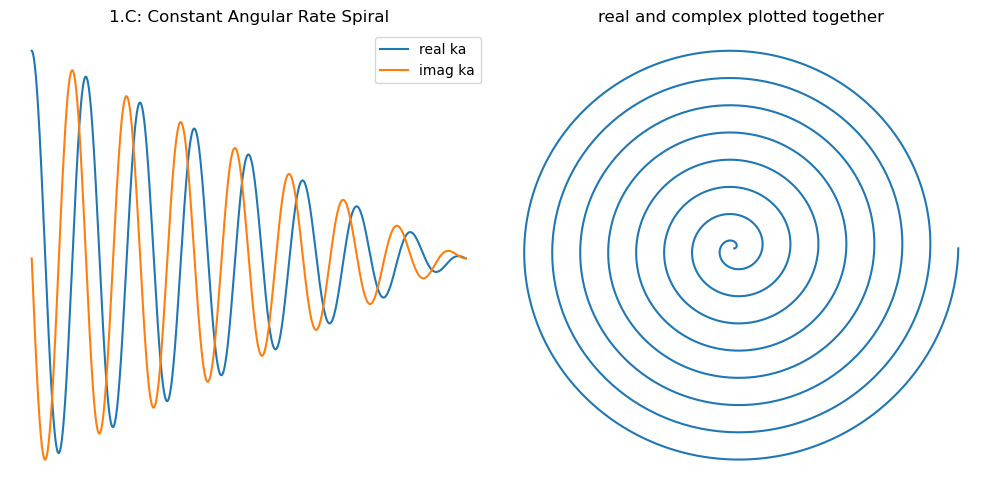

In [2]:
# Import your libraries here
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import torch
import sys

#gyro = 42.576E6*1.5 #MHz/T; the 1T gyromagnetic ratio. Upscaled for 1.5T.
gyro = 42.576E6 #MHz/T; the 1T gyromagnetic ratio. 
#but we are working in gauss, not Tesla, so its 1000x smaller
gyro = 42.576E6*1E-4 #MHz/Gauss; the 1T gyromagnetic ratio. 
gyro = 4257# 

g_max = 4 #G/cm
g_slew= 15#G/cm/ms

#gyro/2pi*G*dZ = 4kHz
dZ = 0.5#cm
kmax = gyro/(2*np.pi) *g_max * dZ#
kmax = kmax/1E3 #normalize to khz
print(f"kmax for 0.5cm resolution: {kmax} KHz")


#dR = 1/(2*k_max)
#FOV_sidelobe=1/dK=2N/2kmax
#side_lobe = 2*N_turns*dR
N_turns = 8/0.5/2 #8*dZ/2 
print(f"N_turns for 8cm sidelobe: {N_turns}")

t = np.linspace(0,1,2048)
ka = kmax*(1-t) * np.exp(1j*2*np.pi*N_turns*(1-t)) #1-t is for time reversal of excitation
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].plot(np.real(ka), label="real ka")
axes[0].plot(np.imag(ka),label="imag ka")
axes[0].legend()
axes[0].set_title("1.C: Constant Angular Rate Spiral")
axes[0].axis('off')
axes[1].plot(np.real(ka),np.imag(ka))
axes[1].set_title('real and complex plotted together')
axes[1].axis('off')
plt.tight_layout()
plt.show()



/root/anaconda3/lib/python3.12/site-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/root/anaconda3/lib/python3.12/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Gradient duration is  4.923 ms
Question: My csg returns a time of 4.9mS instead of 5mS. I expect 5/sqrt(2)~= 3.5mS


/root/anaconda3/lib/python3.12/site-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/root/anaconda3/lib/python3.12/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


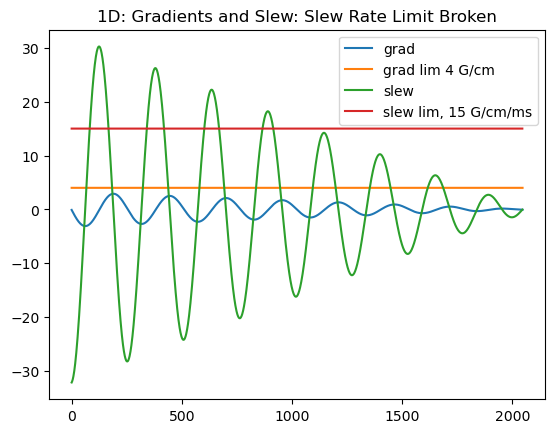

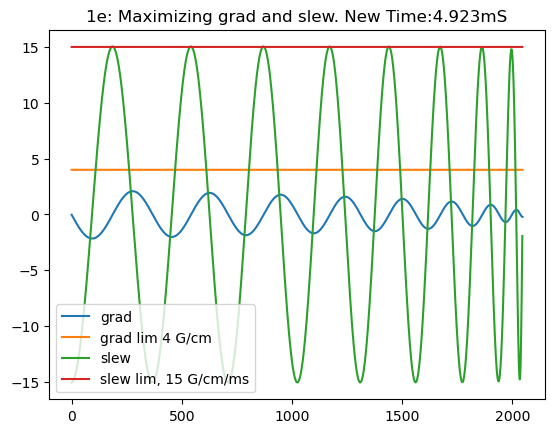

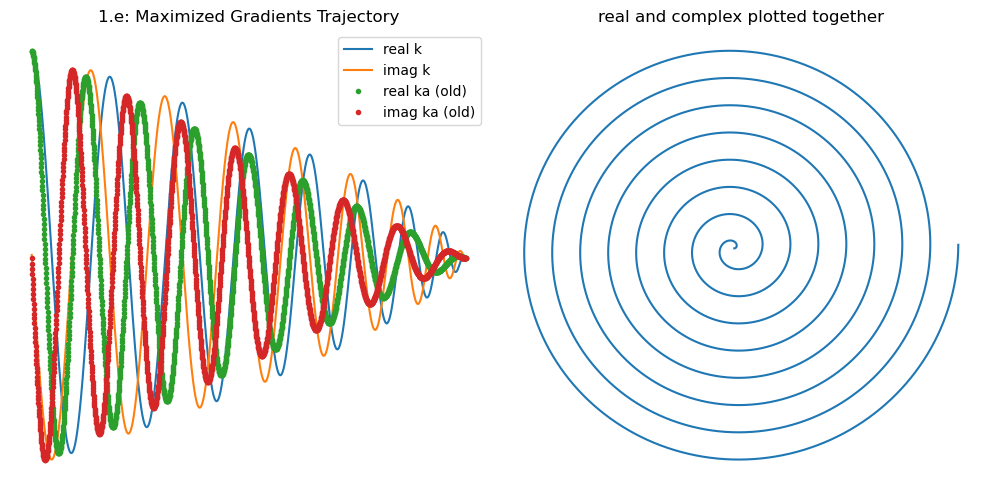

In [3]:
#1d):
from ktog import *
from ktos import *

time_total = 5
dt = time_total/2048
g = ktog(ka,dt)
s = ktos(ka,dt)
plt.figure()
plt.title("1D: Gradients and Slew: Slew Rate Limit Broken")
plt.plot(g, label="grad")
plt.plot(4*np.ones(len(g)),label='grad lim 4 G/cm')
#plt.legend()
#plt.figure()
plt.plot(s,label="slew")
plt.plot(15*np.ones(len(s)), label="slew lim, 15 G/cm/ms")
plt.legend()

#1e): 
from csg import *
k,dt = csg(ka,4,15) #(ka, gmax,slewmax)
#change slew rates to reach limits of the machine. 
#k = ka

g = ktog(k,dt)
s = ktos(k,dt)
plt.figure()
plt.title(f"1e: Maximizing grad and slew. New Time:{dt*len(k):0.3f}mS")
print("Question: My csg returns a time of 4.9mS instead of 5mS. I expect 5/sqrt(2)~= 3.5mS")
plt.plot(g, label="grad")
plt.plot(4*np.ones(len(g)),label='grad lim 4 G/cm')
#plt.legend()
#plt.figure()
plt.plot(s,label="slew")
plt.plot(15*np.ones(len(s)), label="slew lim, 15 G/cm/ms")
plt.legend()


fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].plot(np.real(k), label="real k")
axes[0].plot(np.imag(k),label="imag k")
axes[0].plot(np.real(ka), '.', label="real ka (old)")
axes[0].plot(np.imag(ka), '.', label="imag ka (old)")
axes[0].legend()
axes[0].set_title("1.e: Maximized Gradients Trajectory")
axes[0].axis('off')
axes[1].plot(np.real(k),np.imag(k))
axes[1].set_title('real and complex plotted together')
axes[1].axis('off')
plt.tight_layout()
plt.show()


Question: the faster my dt is, the smaller this RF pulse is, but that doesn't make sense


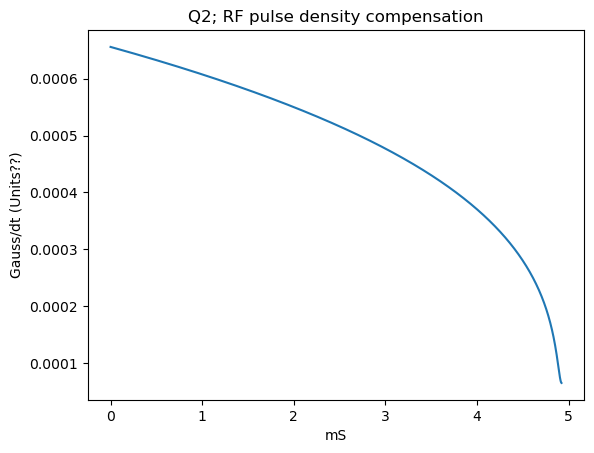

In [4]:
#Q2
rf_density = np.abs(g)
rf_density = rf_density /sum(rf_density)
rf = rf_density
t_ms = np.linspace(0, dt*len(g), num=len(g))
plt.title("Q2; RF pulse density compensation")
plt.plot(t_ms, rf_density)
plt.xlabel("mS")
plt.ylabel("Gauss/dt (Units??)")
print("Question: the faster my dt is, the smaller this RF pulse is, but that doesn't make sense")


Question: the units of |Mx|, magnitude of excited mag? Gauss? Ratio of rf power deposition?
Question: side lobes are at 6cm? At first I thought my csg interp was wrong, but without slew limiters this is still the pattern


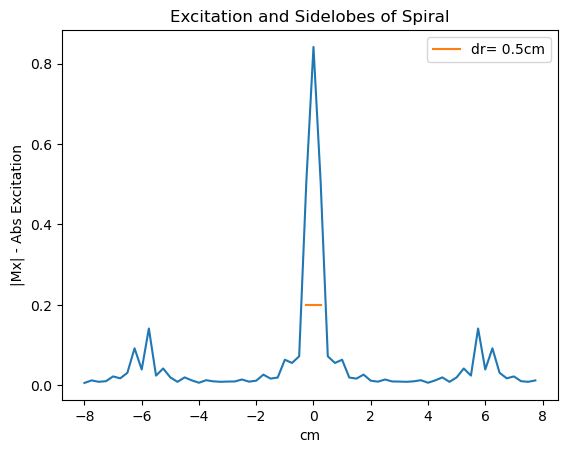

In [5]:
from ab2ex import *
from abrm import *
#Q3:
gs = 2*np.pi*4.257*g*dt  #g is G/cm gradfield, gs is spatial freq; gamma*g*dt in kHz. 
x = np.arange(-8,8, 0.25)
a,b = abrm(rf,gs,x)
mxy1 = ab2ex(a,b)

plt.figure()
plt.title("Excitation and Sidelobes of Spiral")
plt.xlabel("cm")
plt.ylabel("|Mx| - Abs Excitation")
plt.plot(x,np.abs(mxy1))
plt.plot([-0.25,0.25],[0.2,0.2], label="dr= 0.5cm")
plt.legend()
print("Question: the units of |Mx|, magnitude of excited mag? Gauss? Ratio of rf power deposition?")
print("Question: side lobes are at 6cm? At first I thought my csg interp was wrong, but without slew limiters this is still the pattern")


In [6]:
step = 0.5
x = np.arange(-8,8, step)
y = np.arange(-8,8, step)

gs = 2*np.pi*4.257*g*dt  #g is G/cm gradfield, gs is spatial freq; gamma*g*dt in kHz. 
a,b = abrm(rf,gs,x,y)
mxy2 = ab2ex(a,b)



/tmp/ipykernel_666647/1107716286.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
/tmp/ipykernel_666647/1107716286.py:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
/tmp/ipykernel_666647/1107716286.py:26: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


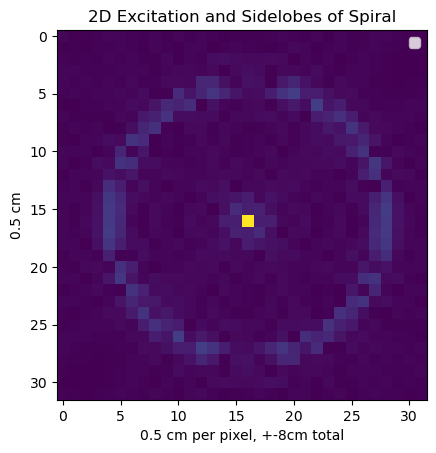

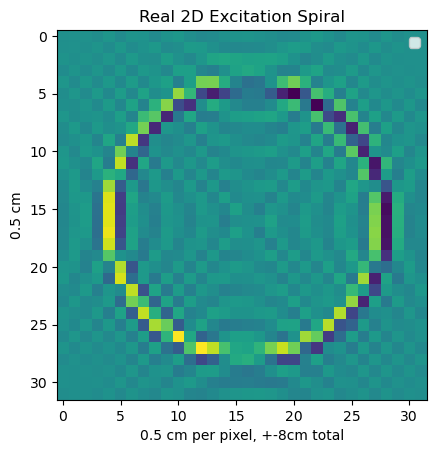

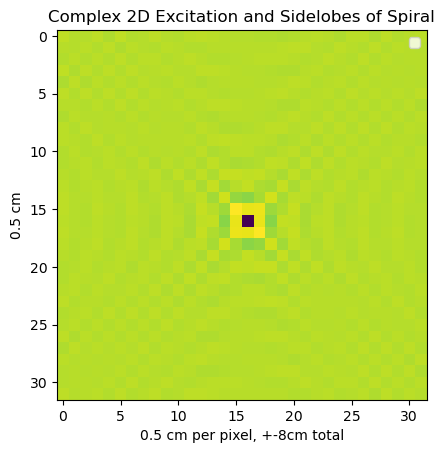

In [7]:
plt.figure()
plt.title("2D Excitation and Sidelobes of Spiral")
plt.xlabel(f"{step} cm per pixel, +-8cm total")
plt.ylabel(f"{step} cm")
#plt.ylabel("|Mx| - Abs Excitation")
plt.imshow(np.abs(mxy2), label="|Mxy| excitation")
#plt.plot([-0.25,0.25],[0.2,0.2], label="dr= 0.5cm")
plt.legend()

plt.figure()
plt.title("Real 2D Excitation Spiral")
plt.xlabel(f"{step} cm per pixel, +-8cm total")
plt.ylabel(f"{step} cm")
#plt.ylabel("|Mx| - Abs Excitation")
plt.imshow(np.real(mxy2), label="|Mxy| excitation")
#plt.plot([-0.25,0.25],[0.2,0.2], label="dr= 0.5cm")
plt.legend()

plt.figure()
plt.title("Complex 2D Excitation and Sidelobes of Spiral")
plt.xlabel(f"{step} cm per pixel, +-8cm total")
plt.ylabel(f"{step} cm")
#plt.ylabel("|Mx| - Abs Excitation")
plt.imshow(np.imag(mxy2), label="|Mxy| excitation")
#plt.plot([-0.25,0.25],[0.2,0.2], label="dr= 0.5cm")
plt.legend()

Question: why is inverse of Jinc used as Rect, I thought sinc/rect was the inverse? Is it  something to do with cylindrical coordinates?


/tmp/ipykernel_666647/2170345702.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


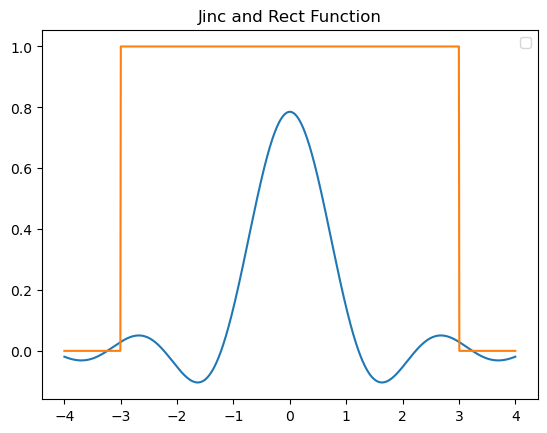

In [23]:
from scipy.special import j1
def jinc(r):
    #
    return j1(r*np.pi)/(2*r)

def rect(r):
    #1 from -0.5 to 0.5. 
    #rect(r/(2*kmax)) yields 1 from -kmax to kmax. 
    return 0.5*(np.sign(r+0.5) + np.sign(0.5 - r))

x = np.linspace(-4, 4, 1000)
plt.figure()
plt.title("Jinc and Rect Function")
plt.plot(x, jinc(x))
plt.plot(x, rect(x/(2*3)))
plt.legend()
print("Question: why is inverse of Jinc used as Rect, I thought sinc/rect was the inverse? Is it  something to do with cylindrical coordinates?")

kmax for 0.5cm resolution: 1.355045185484397 KHz
N_turns for 8cm sidelobe: 8.0
Gradient duration is  4.923 ms


/tmp/ipykernel_666647/2170345702.py:4: RuntimeWarning: invalid value encountered in divide
  return j1(r*np.pi)/(2*r)
/tmp/ipykernel_666647/3641991933.py:50: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


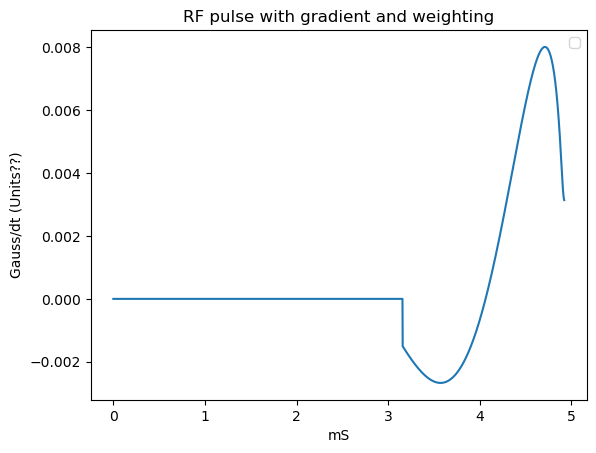

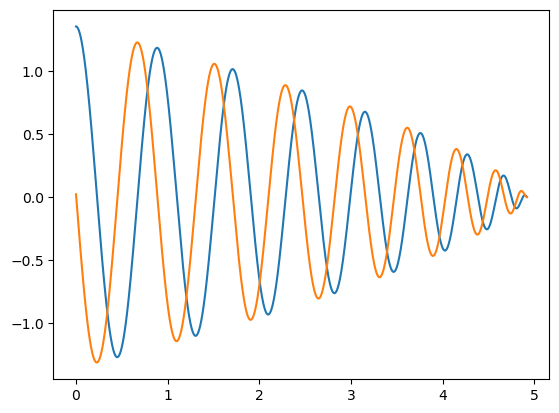

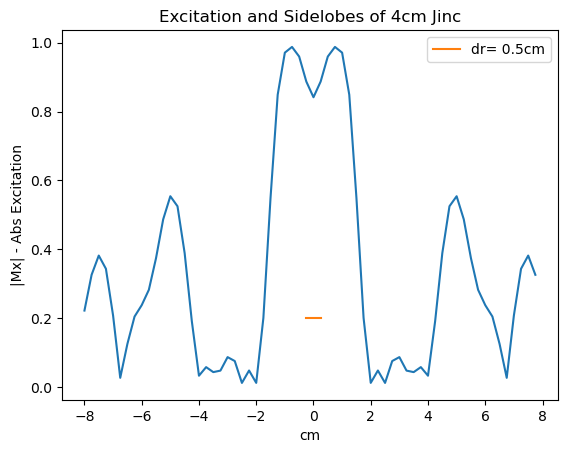

In [36]:
 #Hz/Gauss; the 1T gyromagnetic ratio. 
gyro = 4257# 

g_max = 4 #G/cm
g_slew= 15#G/cm/ms

#gyro/2pi*G*dZ = 4kHz
dZ = 0.5#cm
kmax = gyro/(2*np.pi) *g_max * dZ#
kmax = kmax/1E3 #normalize to khz
print(f"kmax for 0.5cm resolution: {kmax} KHz")

#dR = 1/(2*k_max)
#FOV_sidelobe=1/dK=2N/2kmax
#side_lobe = 2*N_turns*dR
N_turns = 8/0.5/2 #8*dZ/2 
print(f"N_turns for 8cm sidelobe: {N_turns}")

t = np.linspace(0,1,2048)
ka = kmax*(1-t) * np.exp(1j*2*np.pi*N_turns*(1-t)) #1-t is for time reversal of excitation

#1e): 
from csg import *
k,dt = csg(ka,4,15) #(ka, gmax,slewmax)
#change slew rates to reach limits of the machine. 
#k = ka

#look at new gradients:
g = ktog(k,dt)
s = ktos(k,dt)

#Q5: Create weighting: 
N_jinc = 2/dZ
#w_k = jinc(N_jinc*np.abs(k)/kmax)*rect(k/kmax) #k is position in k-space over time, w_k is weighting factor. 
w_k = jinc(N_jinc*np.abs(k)/kmax)*rect(np.abs(k)/kmax) #k is position in k-space over time, w_k is weighting factor. 


##Apply weighting to gradients:
#RF pulse with gradient and weighting:
rf_density = np.abs(g)* w_k[:-1]  #RF density is the rate of the gradient times its w_k position. 
#How much power are you depositing per dt at each position w(k)?  
rf_density = rf_density /sum(rf_density)
rf = rf_density
t_ms = np.linspace(0, dt*len(g), num=len(g))
plt.figure()
plt.title("RF pulse with gradient and weighting")
plt.plot(t_ms, rf_density)
plt.xlabel("mS")
plt.ylabel("Gauss/dt (Units??)")
plt.legend()

plt.figure()
plt.plot(t_ms, np.real(k)[:-1], label="k, real")
plt.plot(t_ms, np.imag(k)[:-1], label="k, imag")

#Q3:
gs = 2*np.pi*4.257*g*dt  #g is G/cm gradfield, gs is spatial freq; gamma*g*dt in kHz. 
x = np.arange(-8,8, 0.25)
a,b = abrm(rf,gs,x)
mxy1 = ab2ex(a,b)

plt.figure()
plt.title("Excitation and Sidelobes of 4cm Jinc")
plt.xlabel("cm")
plt.ylabel("|Mx| - Abs Excitation")
plt.plot(x,np.abs(mxy1))
plt.plot([-0.25,0.25],[0.2,0.2], label="dr= 0.5cm")
plt.legend()


step = 0.5
x = np.arange(-8,8, step)
y = np.arange(-8,8, step)



/tmp/ipykernel_666647/24562789.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
/tmp/ipykernel_666647/24562789.py:22: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
/tmp/ipykernel_666647/24562789.py:33: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


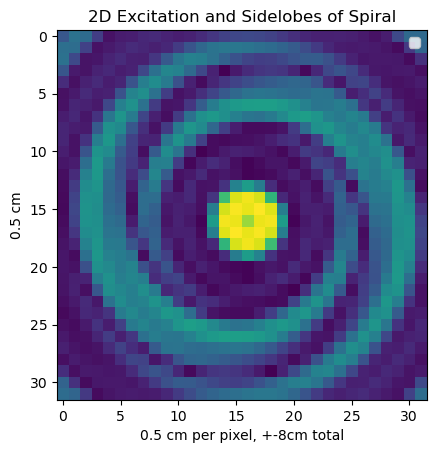

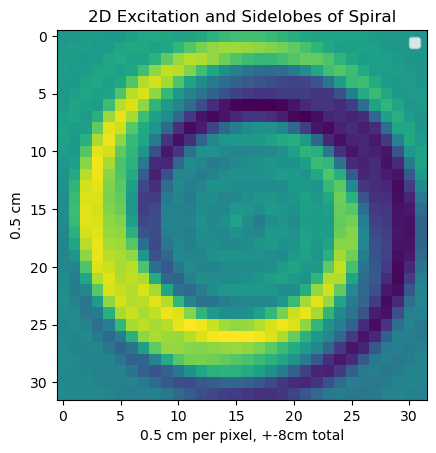

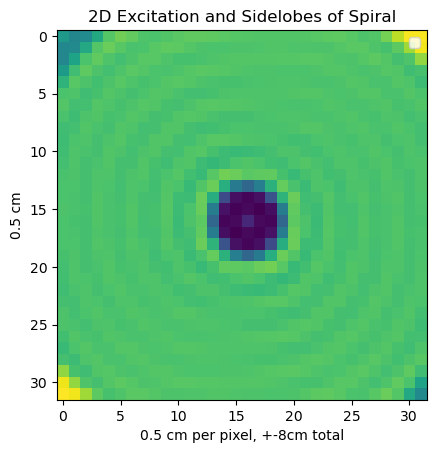

In [39]:
gs = 2*np.pi*4.257*g*dt  #g is G/cm gradfield, gs is spatial freq; gamma*g*dt in kHz. 
a,b = abrm(rf,gs,x,y)
mxy2 = ab2ex(a,b)

plt.figure()
plt.title("2D Excitation and Sidelobes of Spiral")
plt.xlabel(f"{step} cm per pixel, +-8cm total")
plt.ylabel(f"{step} cm")
#plt.ylabel("|Mx| - Abs Excitation")
plt.imshow(np.abs(mxy2), label="|Mxy| excitation")
#plt.plot([-0.25,0.25],[0.2,0.2], label="dr= 0.5cm")
plt.legend()


plt.figure()
plt.title("2D Excitation and Sidelobes of Spiral")
plt.xlabel(f"{step} cm per pixel, +-8cm total")
plt.ylabel(f"{step} cm")
#plt.ylabel("|Mx| - Abs Excitation")
plt.imshow(np.real(mxy2), label="|Mxy| excitation")
#plt.plot([-0.25,0.25],[0.2,0.2], label="dr= 0.5cm")
plt.legend()



plt.figure()
plt.title("2D Excitation and Sidelobes of Spiral")
plt.xlabel(f"{step} cm per pixel, +-8cm total")
plt.ylabel(f"{step} cm")
#plt.ylabel("|Mx| - Abs Excitation")
plt.imshow(np.imag(mxy2), label="|Mxy| excitation")
#plt.plot([-0.25,0.25],[0.2,0.2], label="dr= 0.5cm")
plt.legend()




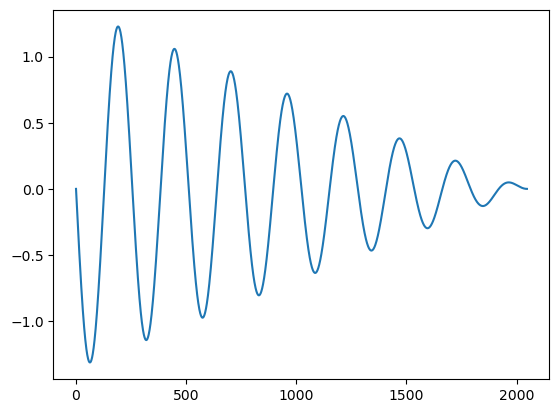

In [17]:
plt.plot(np.imag(ka))

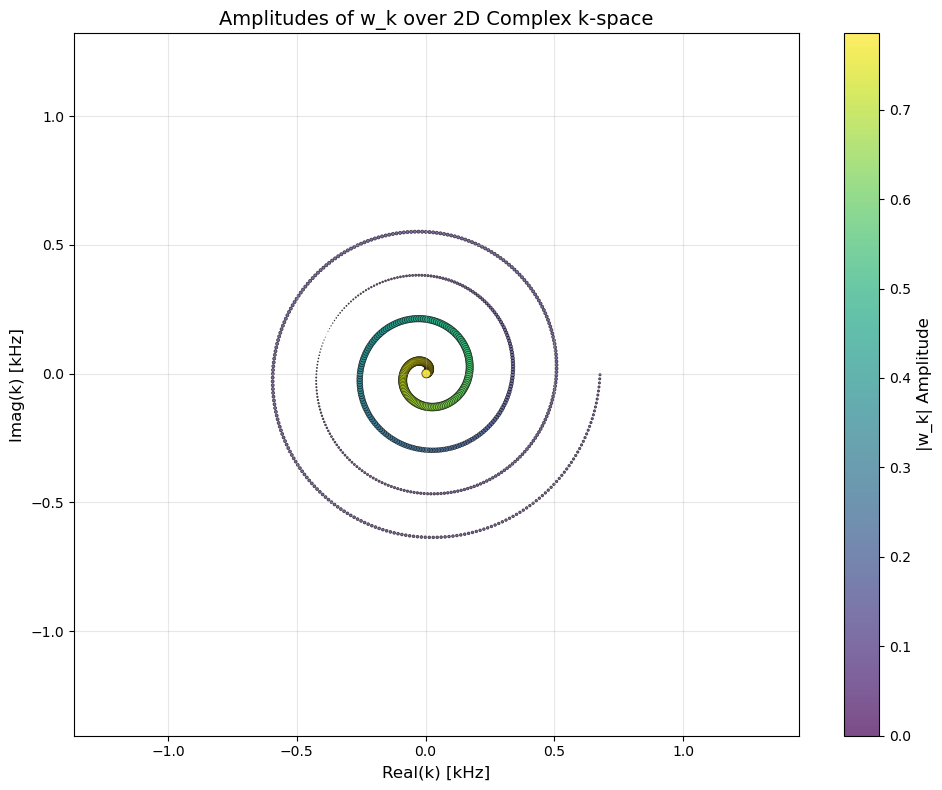

Number of k-space points: 2048
k-space range - Real: [-1.271, 1.355] kHz
k-space range - Imag: [-1.313, 1.228] kHz
w_k amplitude range: [nan, nan]


In [38]:
# Scatter plot of w_k amplitudes over the 2D complex k-space plane
plt.figure(figsize=(10, 8))

# Extract real and imaginary parts of k for positioning
k_real = np.real(k)
k_imag = np.imag(k)

# Get amplitudes of w_k for coloring/sizing
w_k_amplitudes = np.abs(w_k)

# Create scatter plot
scatter = plt.scatter(k_real, k_imag, 
                     c=w_k_amplitudes,  # Color by amplitude
                     s=w_k_amplitudes*50,  # Size by amplitude (scaled for visibility)
                     alpha=0.7,
                     cmap='viridis',
                     edgecolors='black',
                     linewidth=0.5)

# Add colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('|w_k| Amplitude', fontsize=12)

# Labels and title
plt.xlabel('Real(k) [kHz]', fontsize=12)
plt.ylabel('Imag(k) [kHz]', fontsize=12)
plt.title('Amplitudes of w_k over 2D Complex k-space', fontsize=14)

# Add grid for better readability
plt.grid(True, alpha=0.3)

# Equal aspect ratio to preserve shape
plt.axis('equal')

plt.tight_layout()
plt.show()

# Print some statistics
print(f"Number of k-space points: {len(k)}")
print(f"k-space range - Real: [{k_real.min():.3f}, {k_real.max():.3f}] kHz")
print(f"k-space range - Imag: [{k_imag.min():.3f}, {k_imag.max():.3f}] kHz")
print(f"w_k amplitude range: [{w_k_amplitudes.min():.3f}, {w_k_amplitudes.max():.3f}]")


array([0.000e+00, 1.000e+00, 2.000e+00, ..., 1.010e+03, 1.017e+03,
       1.020e+03])